## Problem Set 8

### Problem 0

Run the cell below to make sure you are in the data1030 coding environment. 

We will deduct 2 points for every missing OK sign. (If you don't run the cell, that's -14 points.)


In [2]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.
[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


## Introduction - ML Ethics 

In this problem set we'll explore algorithmic bias using a dataset containing information on criminal offenders screened in Florida from 2013 to 2014. The target variable (`two_year_recid`) for this dataset indicates whether or not an individual committed another crime after being released from prision. 

Machine learning models, known as Risk Assessment Tools (RATs), have been developed based on this and other similar datasets. The goal of these tools is to predict the likelihood of an individual commiting a future crime. These predictive scores are increasingly being used to inform decisions throughout the criminal justice system, including assigning bond amounts and determining sentencing lengths. As you can imagine, false positives and false negatives have severe consequences for the defendant and society in general.

On top of this, the introduction of large language models (LLMs) has added new technical and moral considersations to the development of these predictive pipelines. Increasingly, LLMs are being integrated into the workflows of data scientists who are tasked with creating RATs and other socially centered tools. As such, we will also explore the benefits and limitations of using LLMs to develop socially critical machine learning pipelines.

This problem set is broken down into the following sections:

1. Use ChatGPT to perform EDA on the dataset and answer questions related to ChatGPT's effectiveness  
2. Use ChatGPT to develop a machine learning pipeline, and discuss your findings
3. Debug your inital pipeline and study the model's algorithmic bias

Throughout this problem set you should only be using GPT-3.5. This will allow us to standardize the process across submissions. The csv file and a description are available in the `data` folder.

You can read more about the topic [here](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing) and [here](https://arxiv.org/pdf/2106.05498.pdf).

## Problem 1

In this section we'll perform EDA to get a better sense of our dataset and target variable. You should prompt ChatGPT to create graphics and feature descriptions that would be helpful for better understanding the data. Copy and paste the link to your ChatGPT conversation by clicking on the share icon in the top right hand corner on the ChatGPT UI. We list out several items that you should include in your EDA responses, but feel free to do as much EDA as you'd like! 

Note that you may need to drop some columns that clearly have no predictive power (i.e. id and name). 

### Problem 1a (5 points)

Load in the dataset and perform EDA to show the following:

1. The target variable (using .describe or .value_counts)
3. The datatypes for each feature
4. The fraction of missing values for each feature 
5. The unique races and genders in the dataset and how many people belong to each racial and gender group 

My ChatGPT session for Problem 1a and 1b is here:
https://chat.openai.com/share/a8ca5282-f5d7-4506-91f1-2687b0231c8b

In [1]:
# your code here
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/apple/Desktop/Data 1030/github-classroom-Data1030-Xiner Zhao/ps8-XXXXiner/data/recidivism_data.csv')

# 1. Basic information of the target variable 'two_year_recid'
target_info = df['two_year_recid'].value_counts()
print("Target Variable (two_year_recid) Information:")
print(target_info)

# 2. Datatypes for each feature
data_types = df.dtypes
print("\nDatatypes for Each Feature:")
print(data_types)

# 3. Fraction of missing values for each feature
missing_values = df.isnull().mean()
print("\nFraction of Missing Values for Each Feature:")
print(missing_values[missing_values > 0])

# 4. Unique races and genders in the dataset
unique_races = df['race'].unique()
unique_genders = df['sex'].unique()

print("\nUnique Races in the Dataset:")
print(unique_races)

print("\nUnique Genders in the Dataset:")
print(unique_genders)

# Count of people belonging to each racial and gender group
racial_counts = df['race'].value_counts()
gender_counts = df['sex'].value_counts()

print("\nCount of People in Each Racial Group:")
print(racial_counts)

print("\nCount of People in Each Gender Group:")
print(gender_counts)


Target Variable (two_year_recid) Information:
two_year_recid
0    3963
1    3251
Name: count, dtype: int64

Datatypes for Each Feature:
id                      int64
name                   object
sex                    object
age                     int64
age_cat                object
race                   object
juv_fel_count           int64
juv_misd_count          int64
juv_other_count         int64
priors_count            int64
c_charge_degree        object
r_days_from_arrest    float64
two_year_recid          int64
c_jail_days           float64
custody_days          float64
dtype: object

Fraction of Missing Values for Each Feature:
r_days_from_arrest    0.678958
c_jail_days           0.042556
custody_days          0.032714
dtype: float64

Unique Races in the Dataset:
['Other' 'African-American' 'Caucasian' 'Hispanic' 'Native American'
 'Asian']

Unique Genders in the Dataset:
['Male' 'Female']

Count of People in Each Racial Group:
race
African-American    3696
Caucasian         

### Problem 1b (10 points)

Now let's have ChatGPT perform further EDA to develop the following plots. Keep in mind that we will use accuracy as the evaluation metric:

1. Visualize the target variable 
    - Is the dataset balanced? 
    - What's the baseline accuracy? 
2. Prepare 3 figures to visualize correlations between various features and the target variable 
    - As usual, choose an appropriate visualization type, include axis labels and titles, and write a caption explaining what the figures show. 
    - One figure should show the target variable vs. gender and race.

After completing the above EDA, answer the following questions:

1. In your opinion, how good is ChatGPT at exploring datasets?
2. Could ChatGPT correctly determine whether variables are continuous/ordinal/categorical?
3. Could ChatGPT select appropriate figure types? Were the axes labeled and units shown?
4. Did you encounter buggy code that you had to fix?

Remember to share the link to your ChatGPT session!


My ChatGPT session for Problem 1a and 1b is here:
https://chat.openai.com/share/a8ca5282-f5d7-4506-91f1-2687b0231c8b

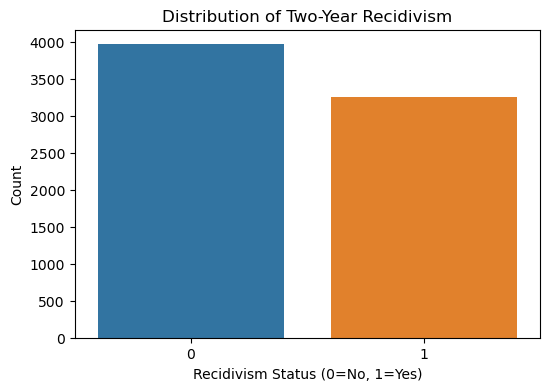


Baseline Accuracy: 54.93%


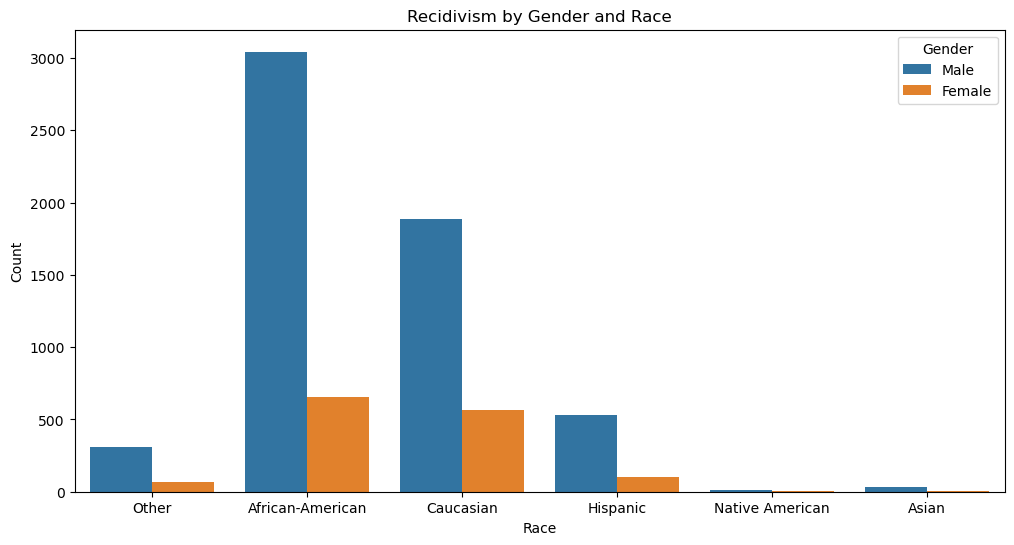

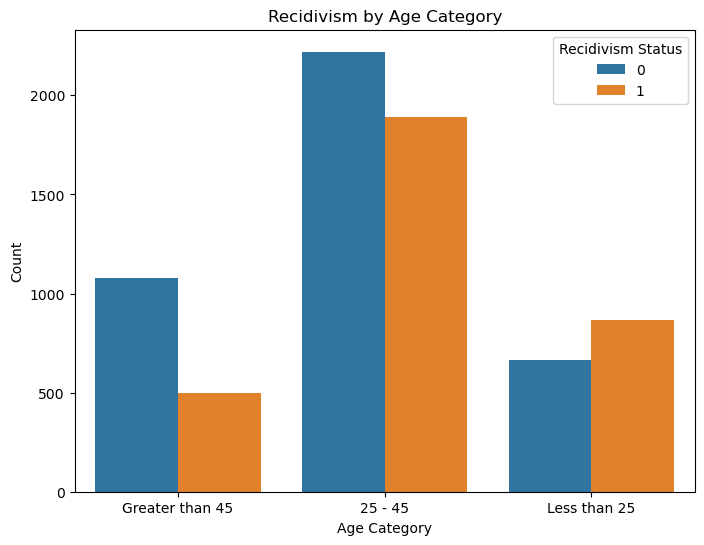

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


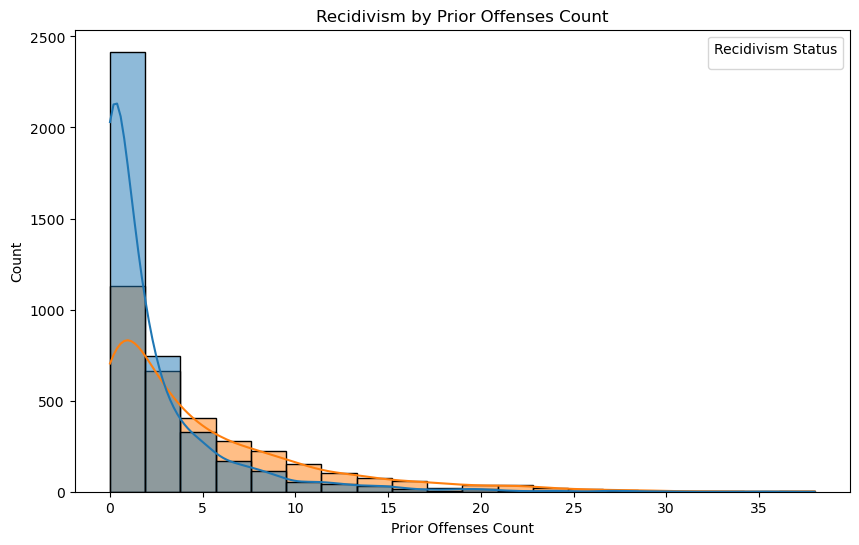


Figure 1 Caption:
This figure illustrates the distribution of recidivism across different genders and races.
Each bar represents a race, and the hue represents gender. The count shows the number of individuals in each category.

Figure 2 Caption:
This figure shows the distribution of recidivism across different age categories.
Each bar represents an age category, and the hue represents recidivism status.

Figure 3 Caption:
This figure illustrates the correlation between recidivism and the count of prior offenses.
The histogram displays the distribution of prior offenses counts for individuals with and without recidivism.


In [2]:
# your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/Users/apple/Desktop/Data 1030/github-classroom-Data1030-Xiner Zhao/ps8-XXXXiner/data/recidivism_data.csv')

# Plot 1: Visualize the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='two_year_recid', data=df)
plt.title('Distribution of Two-Year Recidivism')
plt.xlabel('Recidivism Status (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

# Calculate baseline accuracy
baseline_accuracy = df['two_year_recid'].value_counts(normalize=True).max()
print(f"\nBaseline Accuracy: {baseline_accuracy:.2%}")

# Plot 2: Correlations between various features and the target variable
# Figure 1: Target variable vs. gender and race
plt.figure(figsize=(12, 6))
sns.countplot(x='race', hue='sex', data=df, hue_order=['Male', 'Female'])
plt.title('Recidivism by Gender and Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Figure 2: Target variable vs. age category
plt.figure(figsize=(8, 6))
sns.countplot(x='age_cat', hue='two_year_recid', data=df)
plt.title('Recidivism by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Recidivism Status')
plt.show()

# Figure 3: Target variable vs. prior offenses count
plt.figure(figsize=(10, 6))
sns.histplot(x='priors_count', hue='two_year_recid', data=df, bins=20, kde=True)
plt.title('Recidivism by Prior Offenses Count')
plt.xlabel('Prior Offenses Count')
plt.ylabel('Count')
plt.legend(title='Recidivism Status')
plt.show()

# Additional correlation figures can be added as needed.

# Note: Adjust the figure sizes and additional settings as per your preference.

# Provide captions for the figures
print("\nFigure 1 Caption:")
print("This figure illustrates the distribution of recidivism across different genders and races.")
print("Each bar represents a race, and the hue represents gender. The count shows the number of individuals in each category.")

print("\nFigure 2 Caption:")
print("This figure shows the distribution of recidivism across different age categories.")
print("Each bar represents an age category, and the hue represents recidivism status.")

print("\nFigure 3 Caption:")
print("This figure illustrates the correlation between recidivism and the count of prior offenses.")
print("The histogram displays the distribution of prior offenses counts for individuals with and without recidivism.")

# Additional captions can be added for other correlation figures.

# Note: Ensure that font sizes are readable, axis labels and units are provided, and appropriate figure types are used.


    After completing the above EDA, answer the following questions:

    1. In your opinion, how good is ChatGPT at exploring datasets?

From the results of problem 1a, we could find that if we gave a basic variable description to ChatGPT, the codes it provided could do well in showing the basic information of our datasets (for example, the value count of our target variable and other features, datatypes for each feature, and also the fraction of missing value for each feature, etc). However, ChatGPT could not do as excellent as we expected on visualization (the reasons are given in question 3 below), and also the captions ChatGPT provided were not convincing enough.

    2. Could ChatGPT correctly determine whether variables are continuous/ordinal/categorical?

ChatGPT could not correctly determine whether variables are continuous/ordinal/categorical unless we provided the variable description to it. So if we want to use ChatGPT to help us write prompts on EDA, we should also need to provide variable descriptions to it. Otherwise, we need to identify what the datatype(continuous/ordinal/categorical) of each feature is and modify the codes based on the prompts that ChatGPT provided to us.

    3. Could ChatGPT select appropriate figure types? Were the axes labeled and units shown?

ChatGPT could not select appropriate figure types because ChatGPT did not know what the datatype(continuous/ordinal/categorical) of each feature was unless we provided the variable description to it. Futhermore, if we had provided the variable description to it, ChatGPT still could not select the most appropriate figure types since different figure types might visualize different information on the same features. For example, if we want to visualize a categorical feature vs a continuous feature, there are (maybe at least) three figure types we could use: category-specific histograms, box plot and violin plot. Each figure type could give us different information. For instance, box plot could help us compare the min/max and median values for different groups explicitly but category-specific histograms could not. In addition, even if the axes were labeled, the units were not shown on the figure since ChatGPT did not know the exact unit for each feature unless we explicitly gave the unit information of each feature to ChatGPT.

    4. Did you encounter buggy code that you had to fix?

I did not encounter buggy code from ChatGPT but I had to replace 'recidivism_data.csv' with the actual path to my dataset file.

    Based on the explanation I gave above, I revised the code that ChatGPT provided for Problem 1a and 1b. The revisions focus on:
* I dropped the colum of id and name from dataframe, which clearly have no predictive power.
* I changed the figure 2 into a stacked bar plot, which is better for readers to compare between different groups.
* I added a legend for figure 3 so readers could easily get which color corresponds to which type of individuals.
* I deleted the captions ChatGPT provided and wrote them by myself after visualization.
    
    Here is the revised version:

The shape of data before selection is: (7214, 15)
The shape of data after selection is: (7214, 13)


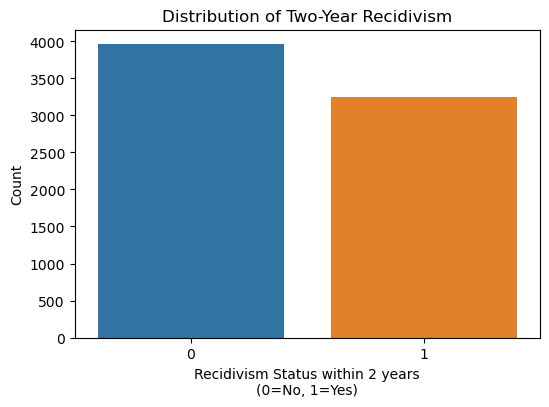


Baseline Accuracy: 54.93%


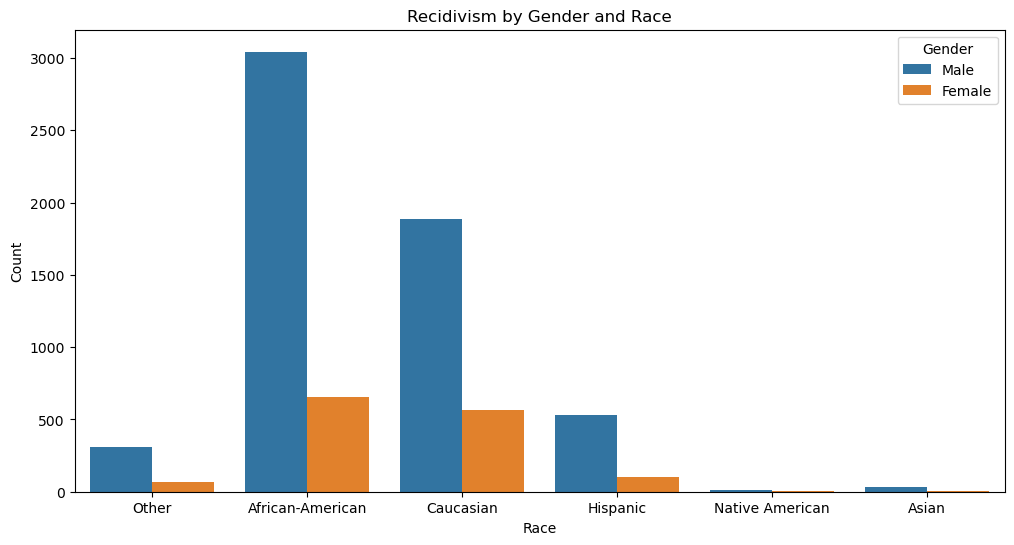

two_year_recid      0     1
age_cat                    
25 - 45          2220  1889
Greater than 45  1078   498
Less than 25      665   864


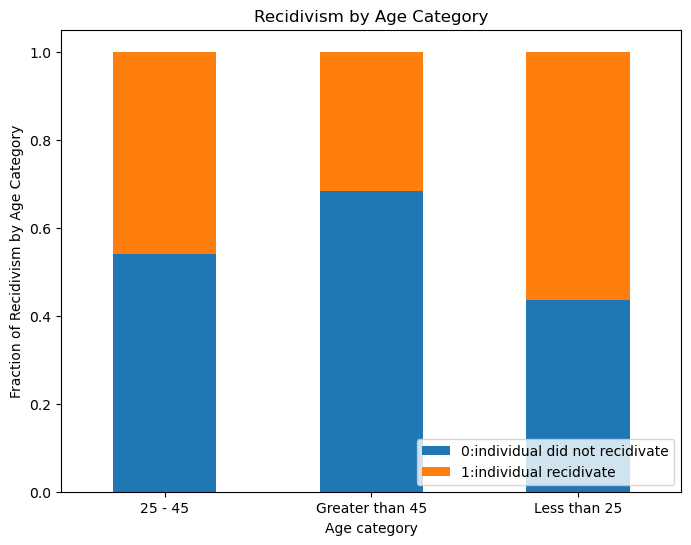

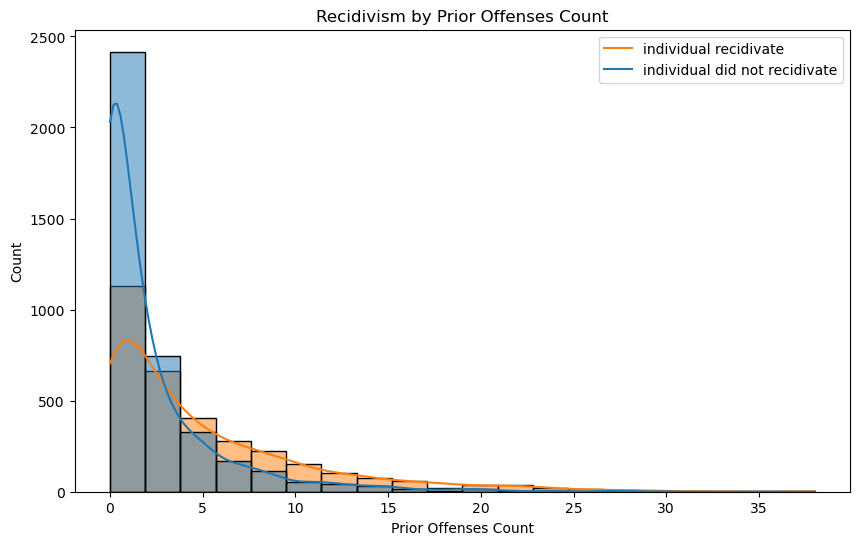

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/Users/apple/Desktop/Data 1030/github-classroom-Data1030-Xiner Zhao/ps8-XXXXiner/data/recidivism_data.csv')
print('The shape of data before selection is:',df.shape)
df.drop(columns=['id','name'],inplace=True)
print('The shape of data after selection is:',df.shape)


# Plot 1: Visualize the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='two_year_recid', data=df)
plt.title('Distribution of Two-Year Recidivism')
plt.xlabel('Recidivism Status within 2 years\n(0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

# Calculate baseline accuracy
baseline_accuracy = df['two_year_recid'].value_counts(normalize=True).max()
print(f"\nBaseline Accuracy: {baseline_accuracy:.2%}")

# Plot 2: Correlations between various features and the target variable
# Figure 1: Target variable vs. gender and race
plt.figure(figsize=(12, 6))
sns.countplot(x='race', hue='sex', data=df, hue_order=['Male', 'Female'])
plt.title('Recidivism by Gender and Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Figure 2: Target variable vs. age category
count_matrix = df.groupby(['age_cat','two_year_recid']).size().unstack()
print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True, figsize=(8,6))
plt.xticks(rotation=0)
plt.xlabel('Age category')
plt.ylabel('Fraction of Recidivism by Age Category')
plt.legend(['0:individual did not recidivate','1:individual recidivate'],loc=4)
plt.title('Recidivism by Age Category')
plt.show()

# Figure 3: Target variable vs. prior offenses count
plt.figure(figsize=(10, 6))
sns.histplot(x='priors_count', hue='two_year_recid', data=df, bins=20, kde=True)
plt.title('Recidivism by Prior Offenses Count')
plt.xlabel('Prior Offenses Count')
plt.ylabel('Count')
plt.legend(['individual recidivate','individual did not recidivate'])
plt.show()

# Additional correlation figures can be added as needed.

# Note: Adjust the figure sizes and additional settings as per your preference.

### The captions for the figures:

* The first figure illustrates the distribution of recidivism across different genders and races. The count shows the number of individuals in each category, and we could see that the recidivism status within 2 years is approximately balanced.

* The second figure shows the distribution of recidivism across different race and gender. We could see that African-American and Caucasian have more people who committed another crimw within two years than any other races. Also, male committed more than female in any race.

* The third figure shows the the distribution of recidivism across different age categories. We could find that the people who are less than 25 committed more than other people in other age categories.

* The fourth figure illustrates the correlation between recidivism and the count of prior offenses. The histogram displays the distribution of prior offenses counts for individuals with and without recidivism.

## Problem 2

In this section, you will build an entire machine learning pipeline to predict the target variable using an XGBoost classifier. You will first use ChatGPT to generate the machine learning pipeline. Then, you'll examine ChatGPT's output and answer ethical questions regarding the use of LLMs for these types of tasks. Next, you'll debug the pipeline so that it can be used to generate predicts, which we can study for algorithmic bias. Remember you should only be using GPT-3.5 to answer these questions!

### Problem 2a (6 points)

Write a prompt that asks ChatGPT to generate a pipeline to perform the following:

1. load in the data 
2. split the data (this dataset is IID)
3. preprocesse the data 
4. train an XGBoost model 
    - tune at least one hyper parameter and use early stopping
    - train on five different random states 
5. save train and test scores 

Copy in the prompt you used to generate the pipeline, as well as the code itself. You can also paste in the link to your ChatGPT conversation by clicking on the share icon in the top right hand corner. 

Answer the following questions:
- What are the shortcomings of ChatGPT's work? Does the code run? If so, are the outputs as expected?
- Besides buggy code, what is one technical issue with relying on ChatGPT to generate a pipeline?
- What is one societal issue with relying on ChatGPT to generate a pipeline?
- Given the issues you identified above, what role should LLMs play in the data science work stream?

The ChatGPT session for Problem 2a is here: https://chat.openai.com/share/8181fd16-3b61-41c0-b830-ddb5a1508b6f

**your prompt here**

Please help me write a Machine Learning pipeline to perform the following:

1. load in the data 
2. split the data (this dataset is IID)
3. preprocesse the data 
4. train an XGBoost model 
    - tune at least one hyper parameter and use early stopping
    - train on five different random states 
5. save train and test scores 

The data I want to use is from the document 'recidivism_data.csv', and here are the data descriptions:

| Variable| Description|
|--------------------------|----------------------------------------------------------------------------------------------------------------|
| id                      | unique identifier for each individual|
| name                    | first and last name|
| sex                     | sex (male or female)|
| age                     | age in years|
| age_cat                 | age category (less than 25, 25-45, greater than 45)|
| race                    | race (African-American, Asian, Caucasian, Hispanic, Native American, Other)|
| juv_fel_count           | juvenile felony count|
| juv_misd_count          | juvenile misdemeanor count|
| juv_other_count         | juvenile other offenses count|
| priors_count            | prior offenses count|
| c_jail_days		  | days between jail exit date for original crime and jail entry date for original crime
| c_charge_degree         | charge degree of original crime, M is misdemeanors, F is felony
| r_days_from_arrest      | number of days between follow-up crime and arrest date|
| custody_days            | days between date on which individual was released from custody and date on which individual was brought into custody|
| two_year_recid          | binary indicator of recidivation within two years of scoring (1=individual recidivated, 0=individual did not recidivate)|

In [4]:
# ~ ChatGPT's ~ code here
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

# Load the data
data = pd.read_csv('/Users/apple/Desktop/Data 1030/github-classroom-Data1030-Xiner Zhao/ps8-XXXXiner/data/recidivism_data.csv')

# Step 2: Split the data
X = data.drop(['id', 'name', 'two_year_recid'], axis=1)
y = data['two_year_recid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Preprocess the data
# In this example, we will use StandardScaler to standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train an XGBoost model with hyperparameter tuning and early stopping
# Define the hyperparameter grid for tuning
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
}

# Use StratifiedKFold for cross-validation to handle imbalanced classes
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost classifier
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Train the XGBoost model on five different random states
for random_state in [42, 123, 456, 789, 999]:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Use GridSearchCV for hyperparameter tuning with early stopping
    grid_search = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=cv, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=[(X_test, y_test)])

    # Get the best model
    best_model = grid_search.best_estimator_

    # Step 5: Save train and test scores
    train_preds = best_model.predict(X_train)
    test_preds = best_model.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)

    # Print the results for each random state
    print(f"Random State: {random_state}")
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("------------------------------------------")

ValueError: could not convert string to float: 'Male'

**your answers here**

Answer the following questions:

    1. What are the shortcomings of ChatGPT's work? Does the code run? If so, are the outputs as expected?

From the output above, we could clearly know that there are some mistakes from the code that ChatGPT generated and the code didn't run. Even if I gave the data desriptions to ChatGPT, it still could not know what real data was like in the csv file. That means it would cause some 'information gap' that ChatGPT could not deal with. For example, during the preprocessing step, ChatGPT only used StandardScaler to preprocess all data, but features 'sex', 'age_cat', 'race', 'c_charge_degree' are all categorical/ordinal features and ChatGPT did not know this information. This information gap (for example, whether to know what the data type of each feature, etc) could only be dealt with after we did the EDA part and got this 'information' from the output. Futhurmore, ChatGPT didn't even know how the ordinal features are sorted, and this information could only be explored by us manually. 

    2. Besides buggy code, what is one technical issue with relying on ChatGPT to generate a pipeline?

I think one of the technical issue with relying on ChatGPT to generate a pipeline is that ChatGPT could not get access to the data we plan to use and could not get specific information of data. For example, ChatGPT could not decide which features are category/ordinal/continuous, and it also doesn't know how the ordinal features are sorted as I explained in Question 1 above. What's more, the pipeline ChatGPT generated only splitted data into train set and test set , but did not split the data into three sets(train, validation, test set).

    3. What is one societal issue with relying on ChatGPT to generate a pipeline?

One social problem with relying on ChatGPT generation pipelines is that the output of ChatGPT's pipeline could be skewed. ChatGPT learns from the data it is trained on, and if that data contains biases, the model may inadvertently replicate or amplify those biases in its response.For example, if training data disproportionately represents certain viewpoints or demographics, the content generated may reflect those biases. This can lead to unfair or discriminatory outcomes, exacerbating existing social inequalities.
    
    4. Given the issues you identified above, what role should LLMs play in the data science work stream?
LLMs can assist in generating codes and code descriptions based on the resources ChatGPT can get access to. This can enhance collaboration and communication within a data science team. Also, if there are some mistakes or bugs which are hard for data scientists to find, LLMs such as ChatGPt could help data science team debug and find the mistakes. This could improve the efficiency in data science work.

### Problem 2b (10 points)

Now let's debug ChatGPT's code to develop a working pipeline! You can either debug the code manually, or you can continue to prompt ChatGPT to fix previous mistakes. If you choose to further prompt ChatGPT, please include your full conversation by pasting in your session link as explained above. 

In addition to getting the pipeline up and running, please do the following:

1. Save the test scores and 5 best models in lists 
2. Save each random state's test set into a list 
    - You should save both the feature matrix and the target series. We will use these sets later to evaluate our model for bias 
    - The sets should be converted into dataframes before being added to the list 
3. Plot the correlation coefficient matrix for the last random state using the training set 
    - Should any of the features be dropped? 
4. Print the mean and standard deviation of the test scores 

The pipeline we built for this assignment has an average test accuracy of 0.842 with a standard deviation of 0.012 across five random states. Your numbers may vary due to randomness but you should look for scores around these benchmarks.

In [162]:
# your code here 
# ~ ChatGPT's ~ code here
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")


# Step 1: Load the data
data = pd.read_csv('/Users/apple/Desktop/Data 1030/github-classroom-Data1030-Xiner Zhao/ps8-XXXXiner/data/recidivism_data.csv')

# Step 2: Split the data
X = data.drop(['id', 'name', 'two_year_recid'], axis=1)
y = data['two_year_recid']

# Step 3: Preprocess the data
ordinal_ftrs = ['age_cat'] 
ordinal_cats = [['Less than 25','25 - 45','Greater than 45']]
onehot_ftrs = ['sex','race','c_charge_degree']
minmax_ftrs = ['age','juv_fel_count','juv_misd_count','juv_other_count']
std_ftrs = ['priors_count','r_days_from_arrest','c_jail_days','custody_days']
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)]) # collect all the encoders

# Step 4: Define the hyperparameter grid for tuning
param_grid = {
    "learning_rate": [0.03],
    "n_estimators": [10],
    "seed": [0],
    "missing": [np.nan], 
    "colsample_bytree": [0.9],              
    "subsample": [0.66],
    "reg_alpha": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
    "reg_lambda": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
    "max_depth": [1,3,10,30,100]
}

random_state = [42, 123, 456, 789, 101]

test_score_list = list(np.zeros(len(random_state)))
best_model_list = list(np.zeros(len(random_state)))
df_train_set = list(np.zeros(len(random_state)))
df_test_set = list(np.zeros(len(random_state)))
y_test_set = list(np.zeros(len(random_state)))
y_test_pred_set = list(np.zeros(len(random_state)))

# Step 5: Train the XGBoost model on five different random states
for i in np.arange(len(random_state)):
    # 1. Split the data into training and testing sets
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state[i])
    X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=random_state[i])

    # 2. Preprocess the data
    prep = Pipeline(steps=[('preprocessor', preprocessor)])

    df_train = prep.fit_transform(X_train)
    df_CV = prep.transform(X_CV)
    df_test = prep.transform(X_test)

    feature_names = preprocessor.get_feature_names_out()
    df_train = pd.DataFrame(data=df_train,columns=feature_names)
    df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
    df_test = pd.DataFrame(data=df_test,columns = feature_names)
    y_test = pd.DataFrame(data=y_test)

    df_train_set[i] = df_train
    df_test_set[i] = df_test
    y_test_set[i] = y_test

    # 3. Train XGBoost classifier and tune hyperparameter by using GridsearchCV
    XGB = XGBClassifier(objective='binary:logistic', eval_metric='logloss')
    grid_search = GridSearchCV(estimator=XGB, param_grid=param_grid, scoring='accuracy', return_train_score = True, verbose=False, n_jobs=-1)
    grid_search.set_params(estimator__early_stopping_rounds=100)
    grid_search.fit(df_train, y_train, eval_set=[(df_CV, y_CV)],verbose=False)

    # 4. Get the best model
    best_model = grid_search.best_estimator_

    # Step 5: Save train and test scores
    test_preds = best_model.predict(df_test)
    y_test_pred_set[i] = pd.DataFrame(data=test_preds)

    # train_accuracy[i] = accuracy_score(y_train, train_preds)
    best_model_list[i] = best_model
    test_score_list[i] = accuracy_score(y_test, test_preds)

    # Print the results for each random state
    print("Random State: ",random_state[i])
    print("Best Hyperparameters:", grid_search.best_params_)
    
# print("Train Accuracy:", train_accuracy)
print("Test accuracy list over 5 random states:", test_score_list)
print("Mean of test accuracy over 5 random states:",np.mean(test_score_list))
print("Standard Deviation of test accuracy over 5 random states:",np.std(test_score_list))
print("------------------------------------------")

Random State:  42
Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 10, 'missing': nan, 'n_estimators': 10, 'reg_alpha': 0.1, 'reg_lambda': 10.0, 'seed': 0, 'subsample': 0.66}
Random State:  123
Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 10, 'missing': nan, 'n_estimators': 10, 'reg_alpha': 1.0, 'reg_lambda': 10.0, 'seed': 0, 'subsample': 0.66}
Random State:  456
Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 10, 'missing': nan, 'n_estimators': 10, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'seed': 0, 'subsample': 0.66}
Random State:  789
Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 10, 'missing': nan, 'n_estimators': 10, 'reg_alpha': 1.0, 'reg_lambda': 100.0, 'seed': 0, 'subsample': 0.66}
Random State:  101
Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 30, 'missing': nan, 'n_estimators': 10, 'reg_alpha': 0

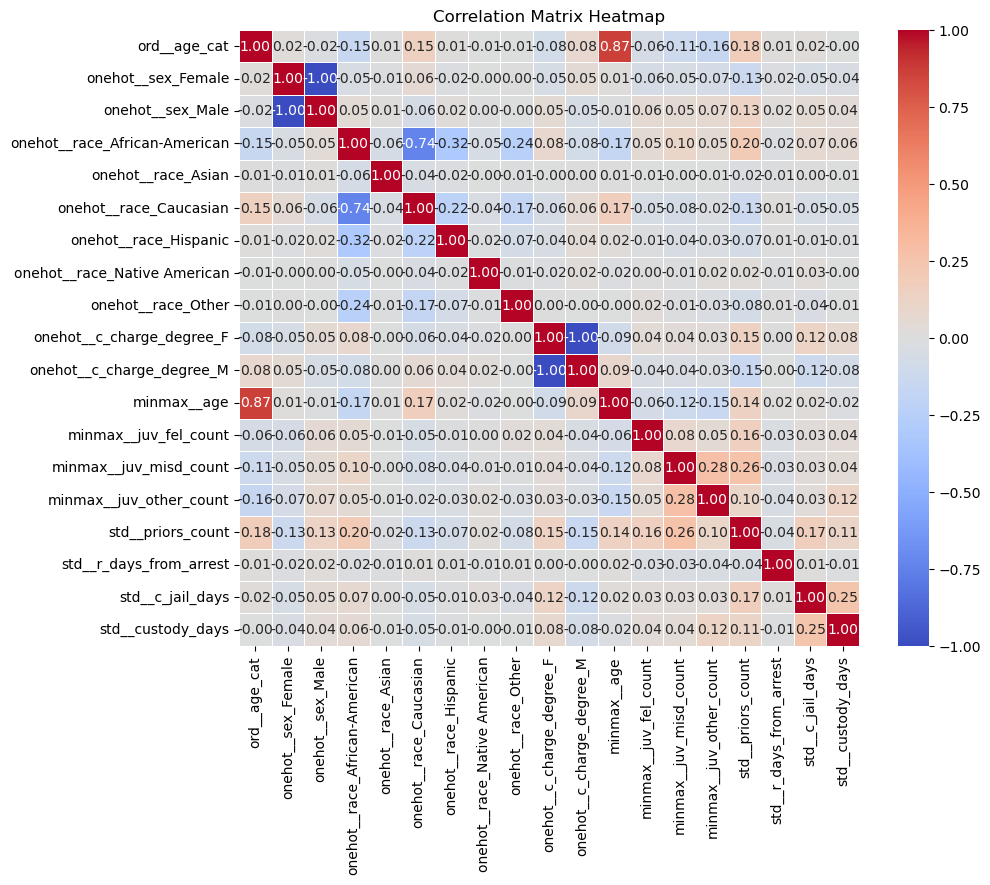

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation coefficient matrix for the last random state using the training set

# (1) Calculate the correlation matrix
corr_mat = df_train_set[-1].corr(method='pearson')

# (2) Plot the correlation coefficient matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.02f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

From the correlation matrix heatmap above, I think we should drop the features which have high correlation coefficient with each other. For example, the feature 'age_cat' has a high correlation with the feature 'age' (the correlation coefficient is -0.87), so we could drop one of them, and it could increase the computational efficiency.

## Problem 3

In this final section, we will use the 5 best models to create predictions for each data point in the saved test sets. We will aggregate these predictions together into one dataframe that we can investigate for a more holistic overview of our models' performance. We will also study the bias that the model has for and against certain genders and races. 


### Problem 3a (10 points)

In this problem, you will work with the 5 models and test sets that you saved in Problem 2. Specifically, use each of the models to predict the target labels of the data points in their corresponding test sets. You should concatenate these predictions, the true labels, and the original test sets into one master dataframe. For guidance, your final dataframe should have the shape: (`num_test_datapoints * 5, num_features + 2`). The two additional columns in this dataframe should be for the true and predicted values of each data point.

Print out the overall accuracy of the model!

In [160]:
df_each_best_model = list(np.zeros(len(best_model_list)))
master_df = list()

for i in np.arange(len(best_model_list)):
    X_test_set[i] = X_test_set[i].reset_index(drop=True)
    y_test_set[i] = y_test_set[i].reset_index(drop=True)
    y_test_pred_set[i] = y_test_pred_set[i].reset_index(drop=True)
    df_each_best_model[i] = pd.concat([X_test_set[i],y_test_set[i],y_test_pred_set[i]],axis=1)

master_df = pd.concat([df_each_best_model[0],df_each_best_model[1],df_each_best_model[2],df_each_best_model[3],df_each_best_model[4]],axis=0)
print(master_df.shape)
overall_accuracy = accuracy_score(master_df.iloc[:,-2],master_df.iloc[:,-1])
print('The overall accuracy is:',overall_accuracy)

(7215, 14)
The overall accuracy is: 0.8462924462924463


### Problem 3b (6 points)

We will now disaggregate the results and study the model's performance across various racial and gender groups. Let's focus on Caucasians and African-Americans because not many people belong to the other racial groups. 

Calculate and plot the following. The confusion matrices should be normalized with respect to the true conditions. We've provided the expected output for the female-only confusion matrix for your reference:

1. overall accuracy and confusion matrix for males
2. overall accuracy and confusion matrix for females
3. overall accuracy and confusion matrix for Caucasians
4. overall accuracy and confusion matrix for African-Americans

Study the accuracies and the normalized false positives in the confusion matrices!

Write a couple of paragraphs and discuss your findings. How do you feel about the overall accuracy of the model? Are there racial and gender groups for which the model performs better/worse? What do the false positives in the confusion matrix mean for criminal defendants?

![alt text](images/confusion_mat.png)


The accuracy percentage of male group is 0.8433797011849562
The false positive percentage of male group is 0.05550239234449761


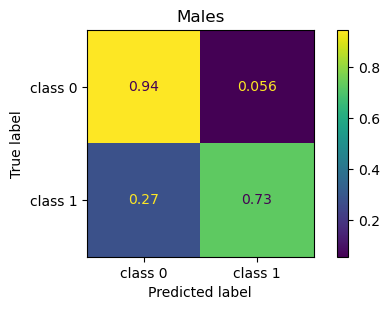

The accuracy percentage of female group is 0.8584770114942529
The false positive percentage of female group is 0.033136094674556214


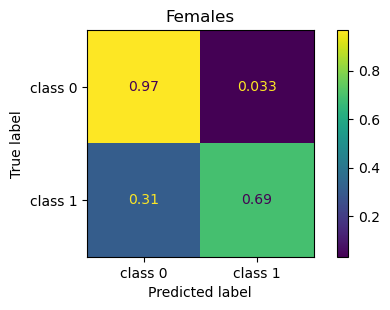

The accuracy percentage of Caucasian group is 0.8731707317073171
The false positive percentage of Caucasian group is 0.03825136612021858


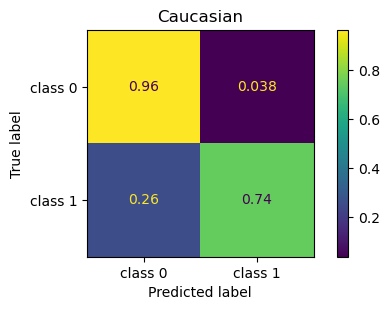

The accuracy percentage of African-American group is 0.8236892148872589
The false positive percentage of African-American group is 0.0704070407040704


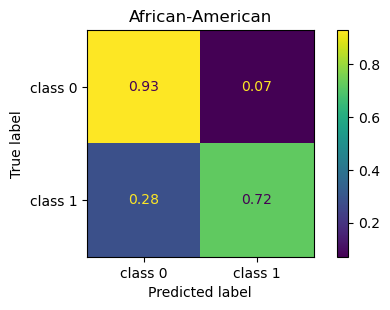

In [161]:
# your code here
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# (1) Males
data_males = master_df[master_df['sex'] == 'Male']
cm = confusion_matrix(data_males.iloc[:,-2],data_males.iloc[:,-1])
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
male_accuracy = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
male_FP = cm_normalized[0,1]
print('The accuracy percentage of male group is',male_accuracy)
print('The false positive percentage of male group is',male_FP)
disp = ConfusionMatrixDisplay(cm_normalized,display_labels=['class 0', 'class 1'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)
plt.tight_layout()
plt.title('Males')
plt.show()

# (2) Females
data_females = master_df[master_df['sex'] == 'Female']
cm = confusion_matrix(data_females.iloc[:,-2],data_females.iloc[:,-1])
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
female_accuracy = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
female_FP = cm_normalized[0,1]
print('The accuracy percentage of female group is',female_accuracy)
print('The false positive percentage of female group is',female_FP)
disp = ConfusionMatrixDisplay(cm_normalized,display_labels=['class 0', 'class 1'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)
plt.tight_layout()
plt.title('Females')
plt.show()

# (3) Caucasians
data_Caucasians = master_df[master_df['race'] == 'Caucasian']
cm = confusion_matrix(data_Caucasians.iloc[:,-2],data_Caucasians.iloc[:,-1])
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
Caucasian_accuracy = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
Caucasian_FP = cm_normalized[0,1]
print('The accuracy percentage of Caucasian group is',Caucasian_accuracy)
print('The false positive percentage of Caucasian group is',Caucasian_FP)
disp = ConfusionMatrixDisplay(cm_normalized,display_labels=['class 0', 'class 1'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)
plt.tight_layout()
plt.title('Caucasian')
plt.show()

#(4) African-Americans
data_African_Americans = master_df[master_df['race'] == 'African-American']
cm = confusion_matrix(data_African_Americans.iloc[:,-2],data_African_Americans.iloc[:,-1])
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
African_American_accuracy = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
African_American_FP = cm_normalized[0,1]
print('The accuracy percentage of African-American group is',African_American_accuracy)
print('The false positive percentage of African-American group is',African_American_FP)
disp = ConfusionMatrixDisplay(cm_normalized,display_labels=['class 0', 'class 1'])
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax)
plt.tight_layout()
plt.title('African-American')
plt.show()

The false positive means the precentage of the individuals who did not commit another crime within two years after being released from prision are predicted to commit another crime. From the outputs above, we could find that all normalized false positives of these four groups are very small. In addition, the accuracies of these four groups are all higher than 0.8. Even if the accuracies of these four groups look pretty high, we want the accuracy to be as high as possible. This is because we don't want to convict people who didn't commit the crime because they are innocent. Crime can have a catastrophic impact on people who have not committed crimes and also their lives. At the same time, we do not want to spare any criminals because failing to convict them could have unpredictable consequences for the safety of society. In conclusion, we want the false positive and false negative to be as low as possible and the accuracies to be as high as possible. What's more, from the outputs above, the model performed similarly across racial and gender groups.